# Plant Available Water

In the early 1900s, soil physics started to emerge as a prominent displine with the goal of better understanding the soil-plant-atmosphere continuum. At that time, the knowledge about the energy-state of soil water was transitioning from a qualitative and discrete classification system (e.g. gravitational, capillary, and hygroscopic) to a quantitative and continuous framework.

An upper and lower soil water content was devised to represent the fraction of soil water that is available to plants, particularly agricultural crops. These concepts are known as *Field Capacity* (FC) and *Permanent Wilting Point* (WP) and represent a basic, yet practical, framework that guided irrigation decisions and crop models for many decades. For a specific layer, the plant available water using this approach is computed as:

$$ PAW = (\theta_{fc} - \theta_{wp}) \Delta z$$

where $\theta$ represents the volumetri soil water content and $z$ the thickness of the soil layer under consideration.

In recent years more sophisticaed frameworks emerged to address some of the limitations of the previous method to compute available soil water. For instance, the previous method assumes that the same amount fo work is required to extract a unit of soil water along the spectrum from FC to PWP. Two methods that emerged as a substitude of the previous method are: 1) Integral water capacity (Groenevelt et al., 2001) and 2) Integral energy (Minasny and McBratney, 2003).


## Integral energy

The integral energy approach aims at characterizing the total amount of work required to extract a given amount of water from the soil. This approach can be useful to better understand plant responses to soil water stress since it does not assume equal availability of water between two potentials like the traditional available water capacity approach.

$$ E_i = \int_{\theta_i}^{\theta_f} \frac{1}{\theta_i - \theta_f} \psi(\theta) \; d\theta$$

We will use the soil water retention model proposed by van Genuchten (1980) since it is the most familiar for students in soil science. 

We will also use the clay and silty clay soil in the original manuscript published by Minasny and McBratney 2003 as an example. The soil water retention curves of these two soils have similar values of volumetric water content at -10 J/kg and -1500 J/kg, but the concavity between these two points is different, which should result in similar plant available water using the traditional approach, but different amount of work between these two points using the integral energy approach.


In [14]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt


In [15]:
# Define soil water retention model (van Genuchten 1980)
model = lambda x,alpha,n,theta_r,theta_s: theta_r+(theta_s-theta_r)*(1+(alpha*x)**n)**-(1-1/n)


In [50]:
# Range in matric potential
fc = 10   # Field capacity (J/kg)
wp = 1500 # Wilting point (J/kg)
N = 10000

# Define absolute values of matric potential
matric = np.logspace(np.log10(fc), np.log10(wp), N) 


In [36]:
# Krasnozem clay (Table 1 Minasny and McBratney, 2003)
theta_clay = model(matric, 1.22, 1.34, 0.23, 0.64)

# Voluemtric water content values at filed capacity and wilting point
fc_clay = theta_clay[0]  # Field capacity, upper limit
wp_clay = theta_clay[-1] # Wilting point, lower limit

# Plant available water
paw_clay = fc_clay - wp_clay

print('Clay at -10 J/kg:', round(fc_clay,3))
print('Clay at -1500 J/kg:', round(wp_clay,3))
print('Clay Plant Available Water Capacity',round(paw_clay,3), "cm^3/cm^3")


Clay at -10 J/kg: 0.404
Clay at -1500 J/kg: 0.262
Clay Plant Available Water Capacity 0.142 cm^3/cm^3


In [37]:
# Xanthozem silty-clay (Table 1 Minasny and McBratney, 2003)
theta_silty_clay = model(matric, 0.05, 1.1, 0, 0.42)

# Voluemtric water content values at filed capacity and wilting point
fc_silty_clay = theta_silty_clay[0]  # Field capacity, upper limit
wp_silty_clay = theta_silty_clay[-1] # Wilting point, lower limit

# Plant available water
paw_silty_clay = fc_silty_clay - wp_silty_clay

print('Silty-clay at -10 J/kg:', round(fc_silty_clay,3))
print('Silty-clay at -1500 J/kg:', round(wp_silty_clay,3))
print('Silty clay Plant Available Water Capacity',round(paw_silty_clay,3), "cm^3/cm^3")


Silty-clay at -10 J/kg: 0.406
Silty-clay at -1500 J/kg: 0.273
Silty clay Plant Available Water Capacity 0.133 cm^3/cm^3


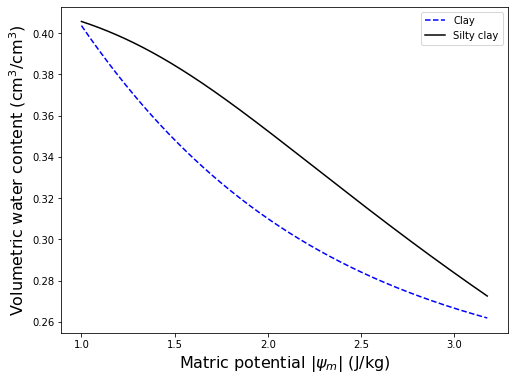

In [43]:
plt.figure(figsize=(8,6))
plt.plot(np.log10(matric), theta_clay, '--b', label='Clay')
plt.plot(np.log10(matric), theta_silty_clay, '-k', label='Silty clay')
plt.xlabel("Matric potential $|\psi_m|$ (J/kg)", size=16)
plt.ylabel("Volumetric water content (cm$^3$/cm$^3$)", size=16)
plt.legend()
plt.show()


## Soil water storage

In [44]:
# Total storage clay between -10 and -1500 J/kg
W_clay = 1/np.abs(fc - wp) * np.trapz(theta_clay, matric)
print(W_clay)


0.2768349634688867


In [45]:
# Total storage silty clay between -10 and -1500 J/kg
storage_silty_clay = 1/np.abs(fc - wp) * np.trapz(theta_silty_clay, matric)
print(storage_silty_clay)


0.3001711916723065


## Energy

Because *theta* in our code is in decreasing order, the $\Delta x$ during the trapezoidal integration will result in negative values. So, I swapped the minuend and subtrahend from $\theta_i - \theta_f$ to $\theta_f - \theta_i$ to reverse the sign.


In [75]:
# Integral energy
theta_i = theta_clay[0]
theta_f = theta_clay[-1]
E_clay = 1/(theta_f - theta_i) * np.trapz(matric, x=theta_clay)
print(round(E_clay*-1), 'J/kg are required to go from FC to WP')


-167.0 J/kg are required to go from FC to WP


In [74]:
theta_i = theta_silty_clay[0]
theta_f = theta_silty_clay[-1]
E_silty_clay = 1/(theta_f - theta_i) * np.trapz(matric, x=theta_silty_clay)
print(round(E_silty_clay*-1), 'J/kg are required to go from FC to WP')


-319.0 J/kg are required to go from FC to WP


## References

Groenevelt, P.H., Grant, C.D. and Semetsa, S., 2001. A new procedure to determine soil water availability. Soil Research, 39(3), pp

Hendrickson, A.H. and Veihmeyer, F.J., 1945. Permanent wilting percentages of soils obtained from field and laboratory trials. Plant physiology, 20(4), p.517.

Minasny, B. and McBratney, A.B., 2003. Integral energy as a measure of soil-water availability. Plant and Soil, 249(2), pp.253-262.

Veihmeyer, F.J. and Hendrickson, A.H., 1931. The moisture equivalent as a measure of the field capacity of soils. Soil Science, 32(3), pp.181-194.